<a href="https://colab.research.google.com/github/grayhacked/AI/blob/main/Deep_learning_perso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installation de tensorflow
!pip install tensorflow

In [6]:
#creer un tenseur qui est une Structures de données de type tableau (similaires à NumPy) utilisées pour stocker et manipuler les données.

#Importation de tensorflow
import tensorflow as tf

#creer un tenseur non modifiable
a = tf.constant([[1,2],[3,4]], dtype=tf.float32)
b = tf.constant([[5,6],[7,8]], dtype=tf.float32)

#addition de deux tenseurs
c = tf.add(a,b)

#afficher le tenseur
print(c)

#multiplication de deux tenseurs
d = tf.multiply(a,b)

#afficher le tenseur
print(d)

#multiplication matriciel
e = tf.matmul(a,b)

#afficher le tenseur
print(e)


tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [5]:
#creer un tenseur modifiable
a = tf.Variable([[1,2],[3,4]], dtype=tf.float32)
b = tf.Variable([[5,6],[7,8]], dtype=tf.float32)

#apporter une modification
a.assign([[10,20],[30,40]])
b.assign([[50,60],[70,80]])

#addition de deux tenseurs
print(tf.add(a,b))
print(tf.multiply(a,b))

tf.Tensor(
[[ 60.  80.]
 [100. 120.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 500. 1200.]
 [2100. 3200.]], shape=(2, 2), dtype=float32)


In [8]:
print("Pysical device available : ", tf.config.list_physical_devices('GPU'))

Pysical device available :  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
dataset = tf.data.Dataset.from_tensor_slices([1,2,3,4,5])
for element in dataset:
  print(element)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [17]:
#dataset en batch
dataset = tf.data.Dataset.from_tensor_slices([1,2,3,4,5])
dataset = dataset.batch(2)
for element in dataset:
  print(element)

tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([3 4], shape=(2,), dtype=int32)
tf.Tensor([5], shape=(1,), dtype=int32)


In [22]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



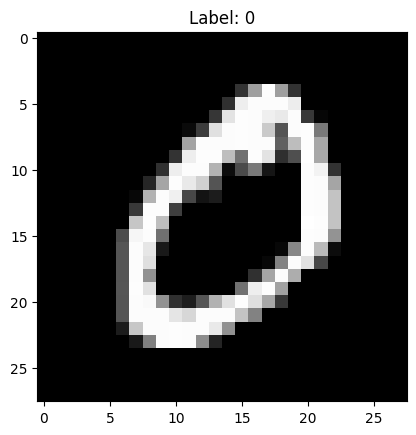

In [28]:
#Etape 1 on charge les donnees

#chargement du dataset Mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

#Etape 2 : on normalise pour ameliorer l'acce;eration

#normalisation des pixels. C'est important de les normaliser parce que les pixels ont des valeurs entre 0 a 255, on normalise entre 0 et 1 pour accelerer l'apprentissage
X_train = X_train.astype('float32') / 255.0  # or X_train, X_test = X_train/255.0, X_test/255.0
X_test = X_test.astype('float32') / 255.0

#affichage d'un echantillon
plt.imshow(X_train[1], cmap='gray')
plt.title('Label: {}'.format(y_train[1]))
plt.show()



In [29]:
#Etape 3 Construire un Réseau de Neurones avec Keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Couche d'entrer applatis qui convertit l'image en un vecteur 1D
    keras.layers.Dense(128, activation='relu'), #Couche cachée avec 128 neurones et une fonction d'activation ReLU
    keras.layers.Dropout(0.2), #Dropout pour éviter l'overfitting
    keras.layers.Dense(10, activation='softmax') # Couche de sortie pour 10 classes
])


#compilaion du modele
model.compile(
    optimizer='adam', #Algorithme d'optimisation
    loss='sparse_categorical_crossentropy', #Fonction de perte
    metrics=['accuracy'] #Métriques pour évaluer le modèle
)

#affichage du resume du model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#Etape 4 : entrainement du modele
model.fit(
    X_train, #Donnees d'entrainement
    y_train, #Donnees d'entrainement
    epochs=10, #Nombre de fois que le model va entrainer, ou nombre de fois qu'on passe sur le modele
    batch_size=32, #Le nombre d'image qu'on traite a la fois, a chaque epoque
    validation_data=(X_test, y_test) #Pour l'evalution du modele a chaque epoque
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8584 - loss: 0.4844 - val_accuracy: 0.9592 - val_loss: 0.1364
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9539 - loss: 0.1559 - val_accuracy: 0.9671 - val_loss: 0.1046
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9672 - loss: 0.1102 - val_accuracy: 0.9745 - val_loss: 0.0851
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.0904 - val_accuracy: 0.9750 - val_loss: 0.0787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9766 - loss: 0.0727 - val_accuracy: 0.9752 - val_loss: 0.0773
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9804 - loss: 0.0639 - val_accuracy: 0.9783 - val_loss: 0.0700
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0561 - val_accuracy: 0.9782 - val_loss: 0.0681
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9838 - loss: 0.0472 -

In [31]:
#Etape 5 : Evaluation du modele

#Après l'entraînement, on teste le modèle sur les données de test.

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0822
Test accuracy: 0.9778000116348267


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


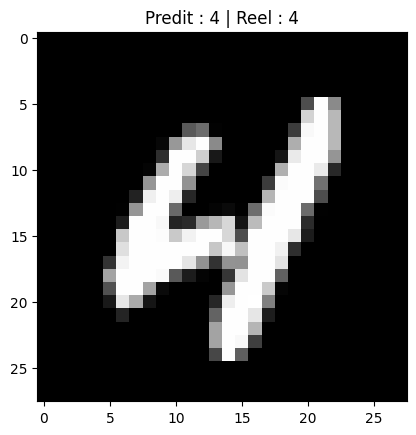

In [32]:
#Etape 6 : Prediction

import random

#selectionner une image au hasard
index = random.randint(0, len(X_test-1))
image = X_test[index]

#faire une prediction
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

#affichage du resultat
plt.imshow(image, cmap='gray')
plt.title(f"Predit : {predicted_label} | Reel : {y_test[index]}")
plt.show()